In [1]:
from hilbert import operators
from hilbert import spaces

import pandas
import numpy

from matplotlib import pyplot

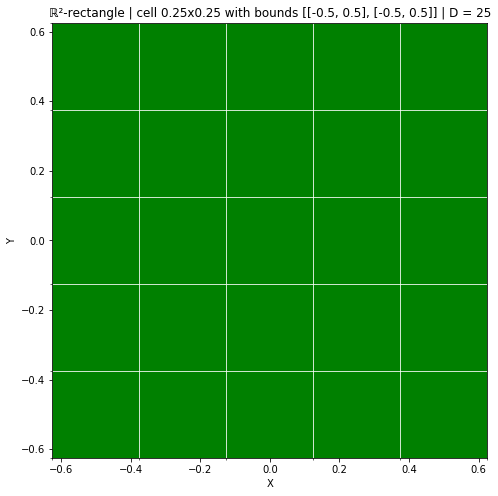

In [2]:
C1L2 = spaces.R2LebesgueSpace(-0.5 - 0.5j, 0.5 + 0.5j, 5)  # make L²-space over ℝ² with `complex128` index

assert C1L2.bases.bounds == [[-0.5, 0.5], [-0.5, 0.5]]
assert C1L2.bases.dimension == 5**2

A = C1L2.op_from_callable(lambda arr: (numpy.random.normal(size=C1L2.bases.dimension) + 0.5j*numpy.random.normal(size=C1L2.bases.dimension)), raw=True)
H = C1L2.operator((A + A.dagger()).o.to_numpy())  # random Hermitian operator
U = C1L2.unitary_op(H)  # random unitary operator - new basis components
C1L2.map_basis(U, new_key='random')  # create new basis by applying U to the position ('delta') basis
fig, ax = C1L2.bases.plot_domain()  # space domain

In [3]:
assert U.is_unitary()  # since U is obtained by exponentiation of an hermitian operator

entry = U.at(0.25j, -0.5j)  # label `at` access by (x, y) in ℂ²
U.put(0.25j, -0.5j, entry + 10**(-9))  # set entry `at` (x, y) in ℂ²

assert not U.is_unitary()

U.put(0.25j, -0.5j, entry)

assert U.is_unitary()

In [4]:
assert C1L2.bases.measure*C1L2.bases.dimension == 1.25**2  # total measure (green) != cell bounds area

In [5]:
# Since U is unitary:
assert C1L2.is_basis('random')  # new basis is actually a basis
assert C1L2.is_orthonormal('random')  # new basis is orthonormal

u, v = C1L2.bases[0.25 - 0.5j, :]  # label `loc` access with x in ℂ

assert u == C1L2.vector('random', C1L2.coords('random', u))  # delta vector as linear combination of the random basis

In [6]:
# new basis images - i.e. components in 'x' - are U's columns
assert all((w.image.i == (1/numpy.sqrt(C1L2.bases.measure))*U.o[ix]).all() for ix, w in C1L2.bases.o['random'].items())

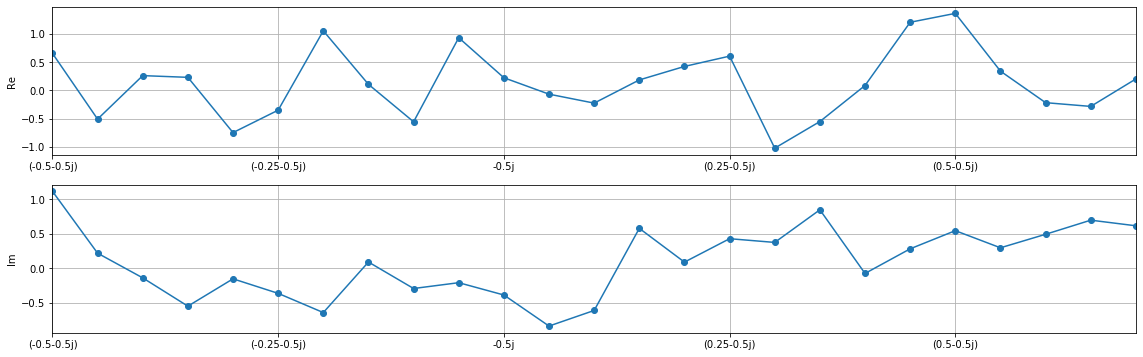

(<Figure size 1397.98x432 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f94195bf940>,
       dtype=object))

In [7]:
v.image.show(style='-o')  # plot a vector

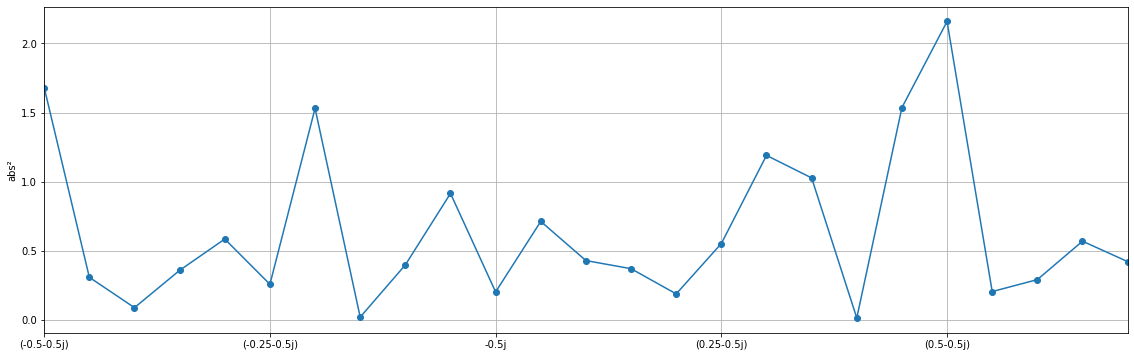

(<Figure size 1397.98x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f94195012b0>)

In [8]:
v.image.show_density(style='-o')  # plot vector abs² values

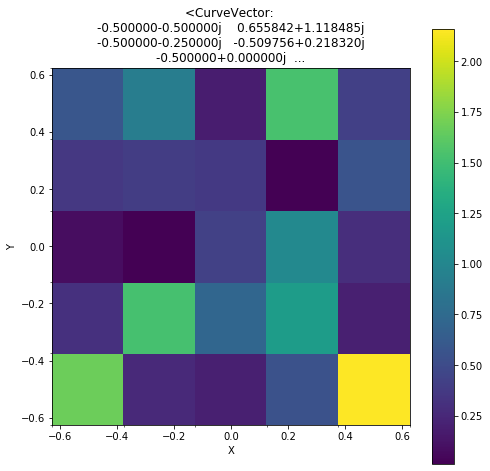

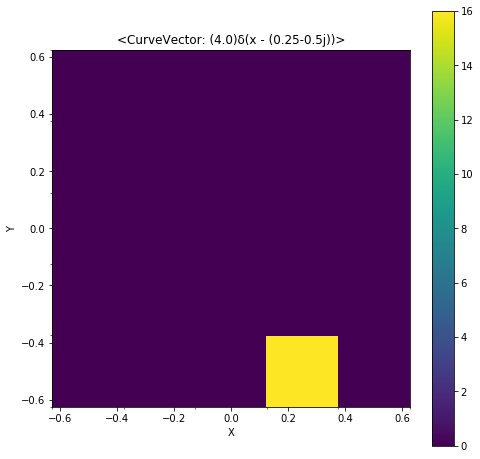

((<Figure size 576x576 with 2 Axes>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7f94194dacc0>),
 (<Figure size 576x576 with 2 Axes>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7f9419501978>))

In [9]:
C1L2.bases.density_plot(v), C1L2.bases.density_plot(u)  # absvalues in the plane

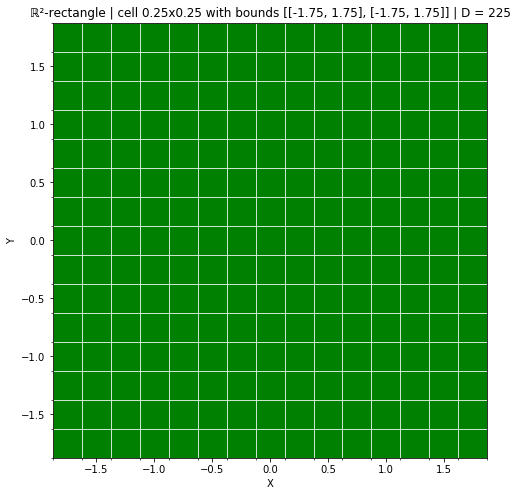

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f941bf3d9e8>)

In [10]:
C1L2.extend()  # replicate once in each direction

assert C1L2.bases.dimension == (5*3)**2  # new dimension

C1L2.bases.plot_domain()

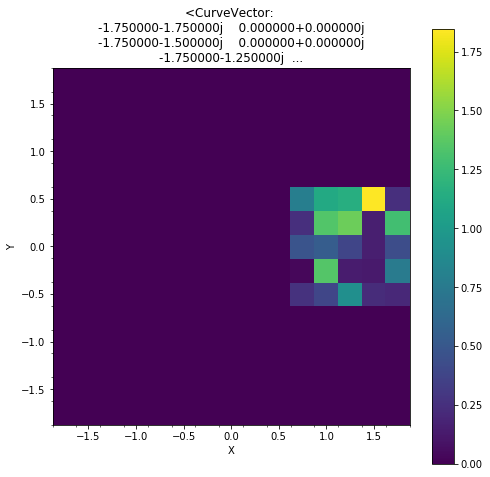

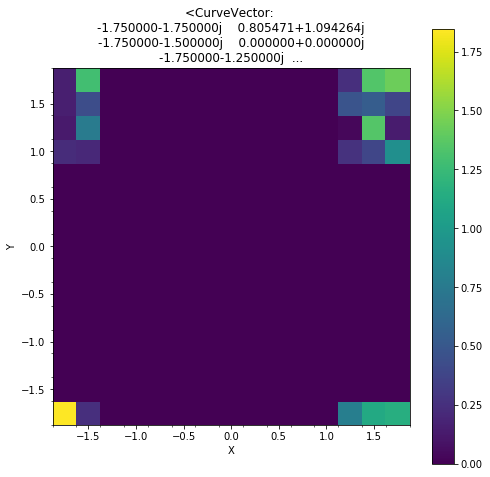

((<Figure size 576x576 with 2 Axes>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7f9413702908>),
 (<Figure size 576x576 with 2 Axes>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7f9413702be0>))

In [11]:
r = C1L2.bases.at(1 + 0.25j, 'random')  # replicated basis vector
assert r == C1L2.translate(r, -3.75*2 + 3.75*3)  # Cyclical translations
rt = C1L2.translate(r, 0.5 + 1.5j)
C1L2.bases.density_plot(r), C1L2.bases.density_plot(rt)

In [12]:
assert (C1L2.bases.as_series(C1L2.bases.as_frame(rt.image.i)) == rt.image.i).all()  # unstack, stack

In [13]:
assert C1L2.is_basis('random')  # automatically extended by vector replication
assert C1L2.is_orthonormal('random')

In [14]:
C1L2.bases.o  # bases data frame

,delta,random
-1.750000-1.750000j,(4.0)δ(x - (-1.75-1.75j)),\n-1.750000-1.750000j 1.045998+0.263290j\n-...
-1.750000-1.500000j,(4.0)δ(x - (-1.75-1.5j)),\n-1.750000-1.750000j -0.024678+0.651203j\n-...
-1.750000-1.250000j,(4.0)δ(x - (-1.75-1.25j)),\n-1.750000-1.750000j 1.397546-0.859368j\n-...
-1.750000-1.000000j,(4.0)δ(x - (-1.75-1j)),\n-1.750000-1.750000j 0.294470-0.814428j\n-...
-1.750000-0.750000j,(4.0)δ(x - (-1.75-0.75j)),\n-1.750000-1.750000j 1.091585+0.423975j\n-...
...,...,...
1.750000+0.750000j,(4.0)δ(x - (1.75+0.75j)),\n-1.750000-1.750000j 0.000000+0.000000j\n-...
1.750000+1.000000j,(4.0)δ(x - (1.75+1j)),\n-1.750000-1.750000j 0.000000+0.000000j\n-...
1.750000+1.250000j,(4.0)δ(x - (1.75+1.25j)),\n-1.750000-1.750000j 0.000000+0.000000j\n-...
1.750000+1.500000j,(4.0)δ(x - (1.75+1.5j)),\n-1.750000-1.750000j 0.000000+0.000000j\n-...


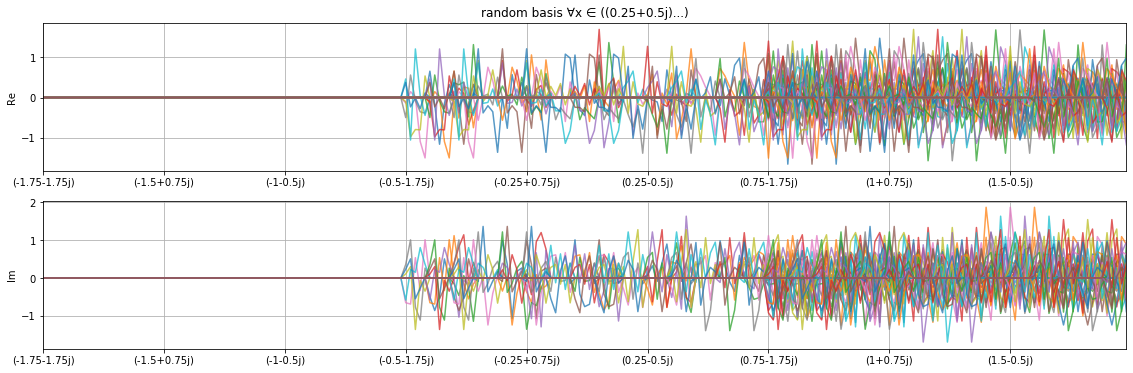

(<Figure size 1397.98x432 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f94134a8470>,
       dtype=object))

In [15]:
C1L2.show_basis_slice('random', 0.25 + 0.5j, style='-', alpha=0.75)  # transformed basis curves

In [16]:
assert (U == ((+U.dagger() + U)*0.5 + (-U.dagger() + U)/2))  # operator algebra

In [17]:
assert (1 - H).at(0.25 - 0.5j, 0.5 - 0.25j) == (1 - H)[0.25 - 0.5j, 0.5 - 0.25j] # rsub